<img align="left" src = https://dirac.astro.washington.edu/wp-content/uploads/2022/03/DIRAC_logo-purple-text_transparent-bckg_ALPHA-1-1.png
 width=190 style="padding: 10px">
<br><b>Modeling White Dwarf / M Dwarf Binary Systems </b> <br>
Contact author: Bob Abel, Željko Ivezić <br>
Last verified to run: 2023-11-08 <br>
LSST Science Piplines version: Weekly 2023_37 <br>
Container size: medium <br>
<br><br>
### &ensp;&ensp;&ensp;&ensp;&ensp;DiRAC Institute</b>


### <span style="color:blue"> TABLE OF CONTENTS
### <span style="color:blue"> I. Introduction 
### <span style="color:blue"> II. Import Modules and Data, Create an Index for 0.1 Mag Increments
### <span style="color:blue"> III. Calculate Fluxes Based on the Magnitudes and Colors
### <span style="color:blue"> IVa. Calculate $M_{r}$ and Colors for a DA/MD Halo Binary System
### <span style="color:blue"> IVb. Calculate $M_{r}$ and Colors for a DA/MD Disk Binary System
### <span style="color:blue"> IVc. Calculate $M_{r}$ and Colors for a DB/MD Halo Binary System
### <span style="color:blue"> IVd. Calculate $M_{r}$ and Colors for a DB/MD Disk Binary System
### <span style="color:blue"> IVe. Calculate $M_{r}$ and Colors for a DC/MD Halo Binary System
### <span style="color:blue"> IVf. Calculate $M_{r}$ and Colors for a DC/MD Disk Binary System
### <span style="color:blue"> V. Compare Colors for Each Type of Binary System
### <span style="color:blue"> VI. Compare Color-Magnitude Plots for Each Type of Binary System
### <span style="color:blue"> VII. Save df_WDMD2 to WDMD.csv </span>


### <span style="color:blue"> I. Introduction</span>
<span style="color:blue"> This code imports the pandas df_WD DataFrame ("**WD.csv**") from **model_WDs.ipynb**, which consists of absolute r-band magnitudes ($M_{r}$) and SDSS colors for white dwarf (WD) stars, and a similar table for M dwarf (MD) stars from Ivezić, **MSandRGBcolors_v1.3.txt**. The white dwarf data are obtained from the [Montreal White Dwarf Database](https://ui.adsabs.harvard.edu/abs/2017ASPC..509....3D/abstracthttps://ui.adsabs.harvard.edu/abs/2017ASPC..509....3D/abstract), the [Warwick Database](https://arxiv.org/abs/2106.07669https://arxiv.org/abs/2106.07669) and [Gaia photogeometric parallaxes](https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=J/MNRAS/508/3877/maincat). $Log_{10}$(g) values were very similar for the H- and He-dominated WD atmospheres, so we used the Montreal and Warwick spectroscopically identified DA, DB and DC categories.<br><br> The M dwarf data includes [Fe/H] values, from which we extract disk ([FeH]=0.0) and halo ([FeH]=-1.5) categories.  8.5 ≤ $M_{r}$ ≤ 14.5 for WD's and MD's, as they both have the same range in a Herzsprung-Russell diagram. Values are given in 0.02 mag increments (301 rows). We calculate fluxes of each type of star based on $M_{r}$ and colors, then combine the fluxes over the range of WD/MD magnitudes and convert back to magnitudes to simulate white dwarf/M dwarf binary systems. Combined magnitudes and colors are calculated for for DA/halo, DA/disk, DB/halo, DB/disk, DC/halo, and DC/disk combinations. We use $\Delta$$M_{r}$ = 0.1 mag - that's 3600 rows of data for each of the 6 categories. The result is df_WDMD2 pandas DataFrame, which is saved as a .csv file (**WDMD.csv**). </span>

### <span style="color:blue"> II. Import Modules and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps

# cmap = colormaps['gist_ncar']
cmap = colormaps['jet']

filter = ['u', 'g', 'r', 'i', 'z']


In [2]:
df_WDMD = pd.read_csv("WD.csv")

df_WDMD.columns

Index(['Mr', 'DAug', 'DAgr', 'DAri', 'DAiz', 'DBug', 'DBgr', 'DBri', 'DBiz',
       'DCug', 'DCgr', 'DCri', 'DCiz'],
      dtype='object')

In [3]:
df_MD = pd.read_csv('MSandRGBcolors_v1.3.txt', sep ='   ', names=['Mr', 'FeH', 'ug', 'gr', 'ri', 'iz', 'zy'], skiprows=3, engine ='python')


### <span style="color:blue">III. Add M Dwarf Data to the Table</span>
<span style="color:blue">This file of M dwarf colors and absolute magnitudes is from Željko.</span>


In [4]:
# Import the M dwarf data (from Željko):
df_MD = pd.read_csv('MSandRGBcolors_v1.3.txt', sep ='   ', names=['Mr', 'FeH', 'ug', 'gr', 'ri', 'iz', 'zy'], skiprows=3, engine ='python')


In [5]:
len(df_MD['ug'])

147951

In [6]:
df_MD = df_MD.dropna()
len(df_MD)

133678

In [7]:
df_MD = df_MD.reset_index()

In [8]:
type(df_MD['ri'][0])

str

In [9]:

df_MD['Mr'] = df_MD['Mr'].astype(float)
df_MD['FeH'] = df_MD['FeH'].astype(float)
df_MD['ug'] = df_MD['ug'].astype(float)
df_MD['gr'] = df_MD['gr'].astype(float)
df_MD['ri'] = df_MD['ri'].astype(float)
df_MD['iz'] = df_MD['iz'].astype(float)
df_MD['zy'] = df_MD['zy'].astype(float)

# Only use data with [FeH] metallicities of 0.0 (disk) and -1.50 (halo) 
# over the range 8.50, 8.52, 8.54, ... 14.50

df_MDhalo = df_MD[(df_MD['FeH'] == -1.5) & (df_MD['Mr'] >= 8.5) & (df_MD['Mr'] <= 14.5)]
df_MDdisk = df_MD[(df_MD['FeH'] == 0.0) & (df_MD['Mr'] >= 8.5) & (df_MD['Mr'] <= 14.5)]



In [10]:
df_MDhalo = df_MDhalo.iloc[::2,:]
df_MDdisk = df_MDdisk.iloc[::2,:]

df_MDhalo = df_MDhalo.reset_index()
df_MDdisk = df_MDdisk.reset_index()


In [11]:
df_WDMD['FeH_disk'] = df_MDdisk['FeH']
df_WDMD['ug_disk'] = df_MDdisk['ug']
df_WDMD['gr_disk'] = df_MDdisk['gr']
df_WDMD['ri_disk'] = df_MDdisk['ri']
df_WDMD['iz_disk'] = df_MDdisk['iz']

df_WDMD['FeH_halo'] = df_MDhalo['FeH']
df_WDMD['ug_halo'] = df_MDhalo['ug']
df_WDMD['gr_halo'] = df_MDhalo['gr']
df_WDMD['ri_halo'] = df_MDhalo['ri']
df_WDMD['iz_halo'] = df_MDhalo['iz']

print('Length of df_WDMD: ', len(df_WDMD))
df_WDMD.columns


Length of df_WDMD:  301


Index(['Mr', 'DAug', 'DAgr', 'DAri', 'DAiz', 'DBug', 'DBgr', 'DBri', 'DBiz',
       'DCug', 'DCgr', 'DCri', 'DCiz', 'FeH_disk', 'ug_disk', 'gr_disk',
       'ri_disk', 'iz_disk', 'FeH_halo', 'ug_halo', 'gr_halo', 'ri_halo',
       'iz_halo'],
      dtype='object')

### <span style="color:blue"> IV. Calculate Fluxes Based on the Magnitudes and Colors

In [12]:
# Calculate Fluxes for the five categories of stars.

# Fluxes for DA White Dwarfs:
df_WDMD['DA_rflux'] = 10**(0.4*(31.4 - df_WDMD['Mr']))
df_WDMD['DA_gflux'] = df_WDMD['DA_rflux']  * 10**(-0.4 * (df_WDMD['DAgr']))
df_WDMD['DA_uflux'] = df_WDMD['DA_rflux']  * 10**(-0.4 * (df_WDMD['DAug'] + df_WDMD['DAgr']))
df_WDMD['DA_iflux'] = df_WDMD['DA_rflux']  * 10**(0.4 * df_WDMD['DAri'])
df_WDMD['DA_zflux'] = df_WDMD['DA_rflux']  * 10**(0.4 * (df_WDMD['DAri'] + df_WDMD['DAiz'])) 
# Fluxes for DB White Dwarfs:
df_WDMD['DB_rflux'] = 10**(0.4*(31.4 - df_WDMD['Mr']))
df_WDMD['DB_gflux'] = df_WDMD['DB_rflux']  * 10**(-0.4 * (df_WDMD['DBgr']))
df_WDMD['DB_uflux'] = df_WDMD['DB_rflux']  * 10**(-0.4 * (df_WDMD['DBug'] + df_WDMD['DBgr']))
df_WDMD['DB_iflux'] = df_WDMD['DB_rflux']  * 10**(0.4 * df_WDMD['DBri'])
df_WDMD['DB_zflux'] = df_WDMD['DB_rflux']  * 10**(0.4 * (df_WDMD['DBri'] + df_WDMD['DBiz'])) 
# Fluxes for DC White Dwarfs:
df_WDMD['DC_rflux'] = 10**(0.4*(31.4 - df_WDMD['Mr']))
df_WDMD['DC_gflux'] = df_WDMD['DC_rflux']  * 10**(-0.4 * (df_WDMD['DCgr']))
df_WDMD['DC_uflux'] = df_WDMD['DC_rflux']  * 10**(-0.4 * (df_WDMD['DCug'] + df_WDMD['DCgr']))
df_WDMD['DC_iflux'] = df_WDMD['DC_rflux']  * 10**(0.4 * df_WDMD['DCri'])
df_WDMD['DC_zflux'] = df_WDMD['DC_rflux']  * 10**(0.4 * (df_WDMD['DCri'] + df_WDMD['DCiz'])) 
# Fluxes for halo M Dwarfs:
df_WDMD['Mh_rflux'] = 10**(0.4*(31.4 - df_WDMD['Mr']))
df_WDMD['Mh_gflux'] = df_WDMD['Mh_rflux'] * 10**(-0.4 * df_WDMD['gr_halo'])
df_WDMD['Mh_uflux'] = df_WDMD['Mh_rflux'] * 10**(-0.4 * (df_WDMD['ug_halo'] + df_WDMD['gr_halo']))
df_WDMD['Mh_iflux'] = df_WDMD['Mh_rflux'] * 10**(0.4 * df_WDMD['ri_halo'])
df_WDMD['Mh_zflux'] = df_WDMD['Mh_rflux'] * 10**(0.4 * (df_WDMD['ri_halo'] + df_WDMD['iz_halo']))
# Fluxes for disk M Dwarfs:
df_WDMD['Md_rflux'] = 10**(0.4*(31.4 - df_WDMD['Mr']))
df_WDMD['Md_gflux'] = df_WDMD['Md_rflux'] * 10**(-0.4 * df_WDMD['gr_disk'])
df_WDMD['Md_uflux'] = df_WDMD['Md_rflux'] * 10**(-0.4 * (df_WDMD['ug_disk'] + df_WDMD['gr_disk']))
df_WDMD['Md_iflux'] = df_WDMD['Md_rflux'] * 10**(0.4 * df_WDMD['ri_disk'])
df_WDMD['Md_zflux'] = df_WDMD['Md_rflux'] * 10**(0.4 * (df_WDMD['ri_disk'] + df_WDMD['iz_disk']))


### <span style="color:blue"> V. Calculate $M_{r}$ and Colors for White Dwarf / M Dwarf Binary Systems 

In [13]:
r_index = []
for i in range(61):
    r_index.append(i*5)


#### <span style="color:blue"> Loop over $M_{r}$ = 8.5-14.5 for the M dwarfs for each value of $M_{r}$ for the White Dwarfs, from 8.5 to 14.5, in 0.1 $\Delta$$M_{r}$ increments.

### <span style="color:blue"> Va. Calculate $M_{r}$ and Colors for a DA/MD Halo Binary System. </span>

In [14]:
# DA White Dwarfs in the halo:
DAh_rfratio = []
DAh_Mr = []
DAh_ug = []
DAh_gr = []
DAh_ri = []
DAh_iz = []
DAh_deltaMr = []
for i in r_index:
    for j in r_index:
        DAh_uflux = df_WDMD['DA_uflux'][i] + df_WDMD['Mh_uflux'][j]
        DAh_gflux = df_WDMD['DA_gflux'][i] + df_WDMD['Mh_gflux'][j]
        DAh_rflux = df_WDMD['DA_rflux'][i] + df_WDMD['Mh_rflux'][j]
        DAh_iflux = df_WDMD['DA_iflux'][i] + df_WDMD['Mh_iflux'][j]
        DAh_zflux = df_WDMD['DA_zflux'][i] + df_WDMD['Mh_zflux'][j]
        DAh_rfratio.append(df_WDMD['DA_rflux'][i] / df_WDMD['Mh_rflux'][j])
        DAh_Mu = -2.5 * np.log10(DAh_uflux) + 31.4
        DAh_Mg = -2.5 * np.log10(DAh_gflux) + 31.4
        DAh_Mi = -2.5 * np.log10(DAh_iflux) + 31.4
        DAh_Mz = -2.5 * np.log10(DAh_zflux) + 31.4
        DAh_Mr_temp = (-2.5 * np.log10(DAh_rflux) + 31.4)
        DAh_Mr.append(DAh_Mr_temp)
        DAh_ug.append(DAh_Mu - DAh_Mg)
        DAh_gr.append(DAh_Mg - DAh_Mr_temp)
        DAh_ri.append(DAh_Mr_temp - DAh_Mi)
        DAh_iz.append(DAh_Mi - DAh_Mz)
        DAh_deltaMr.append(df_WDMD['Mr'][i] - df_WDMD['Mr'][j])


In [15]:
df_WDMD2 = pd.DataFrame()
df_WDMD2['DAh_rfratio'] = DAh_rfratio
df_WDMD2['DAh_Mr'] = DAh_Mr
df_WDMD2['DAh_ug'] = DAh_ug
df_WDMD2['DAh_gr'] = DAh_gr
df_WDMD2['DAh_ri'] = DAh_ri
df_WDMD2['DAh_iz'] = DAh_iz
df_WDMD2['DAh_deltaMr'] = DAh_deltaMr
del DAh_rfratio
del DAh_Mr
del DAh_ug
del DAh_gr
del DAh_ri
del DAh_iz
del DAh_deltaMr

### <span style="color:blue"> Vb. Calculate $M_{r}$ and Colors for a DA/MD Disk Binary System.

In [16]:
# DA White Dwarfs in the disk:
DAd_rfratio = []
DAd_Mr = []
DAd_ug = []
DAd_gr = []
DAd_ri = []
DAd_iz = []
DAd_deltaMr = []
for i in r_index:
    for j in r_index:
        DAd_uflux = df_WDMD['DA_uflux'][i] + df_WDMD['Md_uflux'][j]
        DAd_gflux = df_WDMD['DA_gflux'][i] + df_WDMD['Md_gflux'][j]
        DAd_rflux = df_WDMD['DA_rflux'][i] + df_WDMD['Md_rflux'][j]
        DAd_iflux = df_WDMD['DA_iflux'][i] + df_WDMD['Md_iflux'][j]
        DAd_zflux = df_WDMD['DA_zflux'][i] + df_WDMD['Md_zflux'][j]
        DAd_rfratio.append(df_WDMD['DA_rflux'][i] / df_WDMD['Md_rflux'][j])
        DAd_Mu = -2.5 * np.log10(DAd_uflux) + 31.4
        DAd_Mg = -2.5 * np.log10(DAd_gflux) + 31.4
        DAd_Mi = -2.5 * np.log10(DAd_iflux) + 31.4
        DAd_Mz = -2.5 * np.log10(DAd_zflux) + 31.4
        DAd_Mr_temp = (-2.5 * np.log10(DAd_rflux) + 31.4)
        DAd_Mr.append(DAd_Mr_temp)
        DAd_ug.append(DAd_Mu - DAd_Mg)
        DAd_gr.append(DAd_Mg - DAd_Mr_temp)
        DAd_ri.append(DAd_Mr_temp - DAd_Mi)
        DAd_iz.append(DAd_Mi - DAd_Mz)
        DAd_deltaMr.append(df_WDMD['Mr'][i] - df_WDMD['Mr'][j])


In [17]:
df_WDMD2['DAd_rfratio'] = DAd_rfratio
df_WDMD2['DAd_Mr'] = DAd_Mr
df_WDMD2['DAd_ug'] = DAd_ug
df_WDMD2['DAd_gr'] = DAd_gr
df_WDMD2['DAd_ri'] = DAd_ri
df_WDMD2['DAd_iz'] = DAd_iz
df_WDMD2['DAd_deltaMr'] = DAd_deltaMr
del DAd_rfratio
del DAd_Mr
del DAd_ug
del DAd_gr
del DAd_ri
del DAd_iz
del DAd_deltaMr

### <span style="color:blue"> Vc. Calculate $M_{r}$ and Colors for a DB/MD Halo Binary System.

In [18]:
# DA White Dwarfs in the halo:
DBh_rfratio = []
DBh_Mr = []
DBh_ug = []
DBh_gr = []
DBh_ri = []
DBh_iz = []
DBh_deltaMr = []
for i in r_index:
    for j in r_index:
        DBh_uflux = df_WDMD['DB_uflux'][i] + df_WDMD['Mh_uflux'][j]
        DBh_gflux = df_WDMD['DB_gflux'][i] + df_WDMD['Mh_gflux'][j]
        DBh_rflux = df_WDMD['DB_rflux'][i] + df_WDMD['Mh_rflux'][j]
        DBh_iflux = df_WDMD['DB_iflux'][i] + df_WDMD['Mh_iflux'][j]
        DBh_zflux = df_WDMD['DB_zflux'][i] + df_WDMD['Mh_zflux'][j]
        DBh_rfratio.append(df_WDMD['DB_rflux'][i] / df_WDMD['Mh_rflux'][j])
        DBh_Mu = -2.5 * np.log10(DBh_uflux) + 31.4
        DBh_Mg = -2.5 * np.log10(DBh_gflux) + 31.4
        DBh_Mi = -2.5 * np.log10(DBh_iflux) + 31.4
        DBh_Mz = -2.5 * np.log10(DBh_zflux) + 31.4
        DBh_Mr_temp = (-2.5 * np.log10(DBh_rflux) + 31.4)
        DBh_Mr.append(DBh_Mr_temp)
        DBh_ug.append(DBh_Mu - DBh_Mg)
        DBh_gr.append(DBh_Mg - DBh_Mr_temp)
        DBh_ri.append(DBh_Mr_temp - DBh_Mi)
        DBh_iz.append(DBh_Mi - DBh_Mz)
        DBh_deltaMr.append(df_WDMD['Mr'][i] - df_WDMD['Mr'][j])


In [19]:
df_WDMD2['DBh_rfratio'] = DBh_rfratio
df_WDMD2['DBh_Mr'] = DBh_Mr
df_WDMD2['DBh_ug'] = DBh_ug
df_WDMD2['DBh_gr'] = DBh_gr
df_WDMD2['DBh_ri'] = DBh_ri
df_WDMD2['DBh_iz'] = DBh_iz
df_WDMD2['DBh_deltaMr'] = DBh_deltaMr
del DBh_rfratio
del DBh_Mr
del DBh_ug
del DBh_gr
del DBh_ri
del DBh_iz
del DBh_deltaMr

### <span style="color:blue"> Vd. Calculate $M_{r}$ and Colors for a DB/MD Disk Binary System.

In [20]:
# DA White Dwarfs in the disk:
DBd_rfratio = []
DBd_Mr = []
DBd_ug = []
DBd_gr = []
DBd_ri = []
DBd_iz = []
DBd_deltaMr = []
for i in r_index:
    for j in r_index:
        DBd_uflux = df_WDMD['DB_uflux'][i] + df_WDMD['Md_uflux'][j]
        DBd_gflux = df_WDMD['DB_gflux'][i] + df_WDMD['Md_gflux'][j]
        DBd_rflux = df_WDMD['DB_rflux'][i] + df_WDMD['Md_rflux'][j]
        DBd_iflux = df_WDMD['DB_iflux'][i] + df_WDMD['Md_iflux'][j]
        DBd_zflux = df_WDMD['DB_zflux'][i] + df_WDMD['Md_zflux'][j]
        DBd_rfratio.append(df_WDMD['DB_rflux'][i] / df_WDMD['Md_rflux'][j])
        DBd_Mu = -2.5 * np.log10(DBd_uflux) + 31.4
        DBd_Mg = -2.5 * np.log10(DBd_gflux) + 31.4
        DBd_Mi = -2.5 * np.log10(DBd_iflux) + 31.4
        DBd_Mz = -2.5 * np.log10(DBd_zflux) + 31.4
        DBd_Mr_temp = (-2.5 * np.log10(DBd_rflux) + 31.4)
        DBd_Mr.append(DBd_Mr_temp)
        DBd_ug.append(DBd_Mu - DBd_Mg)
        DBd_gr.append(DBd_Mg - DBd_Mr_temp)
        DBd_ri.append(DBd_Mr_temp - DBd_Mi)
        DBd_iz.append(DBd_Mi - DBd_Mz)
        DBd_deltaMr.append(df_WDMD['Mr'][i] - df_WDMD['Mr'][j])


In [21]:
df_WDMD2['DBd_rfratio'] = DBd_rfratio
df_WDMD2['DBd_Mr'] = DBd_Mr
df_WDMD2['DBd_ug'] = DBd_ug
df_WDMD2['DBd_gr'] = DBd_gr
df_WDMD2['DBd_ri'] = DBd_ri
df_WDMD2['DBd_iz'] = DBd_iz
df_WDMD2['DBd_deltaMr'] = DBd_deltaMr
del DBd_rfratio
del DBd_Mr
del DBd_ug
del DBd_gr
del DBd_ri
del DBd_iz
del DBd_deltaMr

### <span style="color:blue"> Ve. Calculate $M_{r}$ and Colors for a DC/MD Halo Binary System.

In [22]:
# DA White Dwarfs in the halo:
DCh_rfratio = []
DCh_Mr = []
DCh_ug = []
DCh_gr = []
DCh_ri = []
DCh_iz = []
DCh_deltaMr = []
for i in r_index:
    for j in r_index:
        DCh_uflux = df_WDMD['DC_uflux'][i] + df_WDMD['Mh_uflux'][j]
        DCh_gflux = df_WDMD['DC_gflux'][i] + df_WDMD['Mh_gflux'][j]
        DCh_rflux = df_WDMD['DC_rflux'][i] + df_WDMD['Mh_rflux'][j]
        DCh_iflux = df_WDMD['DC_iflux'][i] + df_WDMD['Mh_iflux'][j]
        DCh_zflux = df_WDMD['DC_zflux'][i] + df_WDMD['Mh_zflux'][j]
        DCh_rfratio.append(df_WDMD['DC_rflux'][i] / df_WDMD['Mh_rflux'][j])
        DCh_Mu = -2.5 * np.log10(DCh_uflux) + 31.4
        DCh_Mg = -2.5 * np.log10(DCh_gflux) + 31.4
        DCh_Mi = -2.5 * np.log10(DCh_iflux) + 31.4
        DCh_Mz = -2.5 * np.log10(DCh_zflux) + 31.4
        DCh_Mr_temp = (-2.5 * np.log10(DCh_rflux) + 31.4)
        DCh_Mr.append(DCh_Mr_temp)
        DCh_ug.append(DCh_Mu - DCh_Mg)
        DCh_gr.append(DCh_Mg - DCh_Mr_temp)
        DCh_ri.append(DCh_Mr_temp - DCh_Mi)
        DCh_iz.append(DCh_Mi - DCh_Mz)
        DCh_deltaMr.append(df_WDMD['Mr'][i] - df_WDMD['Mr'][j])

In [23]:
df_WDMD2['DCh_rfratio'] = DCh_rfratio
df_WDMD2['DCh_Mr'] = DCh_Mr
df_WDMD2['DCh_ug'] = DCh_ug
df_WDMD2['DCh_gr'] = DCh_gr
df_WDMD2['DCh_ri'] = DCh_ri
df_WDMD2['DCh_iz'] = DCh_iz
df_WDMD2['DCh_deltaMr'] = DCh_deltaMr
del DCh_rfratio
del DCh_Mr
del DCh_ug
del DCh_gr
del DCh_ri
del DCh_iz
del DCh_deltaMr

### <span style="color:blue"> Vf. Calculate $M_{r}$ and Colors for a DC/MD Disk Binary System.

In [24]:
# DA White Dwarfs in the halo:
DCd_rfratio = []
DCd_Mr = []
DCd_ug = []
DCd_gr = []
DCd_ri = []
DCd_iz = []
DCd_deltaMr = []
for i in r_index:
    for j in r_index:
        DCd_uflux = df_WDMD['DC_uflux'][i] + df_WDMD['Md_uflux'][j]
        DCd_gflux = df_WDMD['DC_gflux'][i] + df_WDMD['Md_gflux'][j]
        DCd_rflux = df_WDMD['DC_rflux'][i] + df_WDMD['Md_rflux'][j]
        DCd_iflux = df_WDMD['DC_iflux'][i] + df_WDMD['Md_iflux'][j]
        DCd_zflux = df_WDMD['DC_zflux'][i] + df_WDMD['Md_zflux'][j]
        DCd_rfratio.append(df_WDMD['DC_rflux'][i] / df_WDMD['Md_rflux'][j])
        DCd_Mu = -2.5 * np.log10(DCd_uflux) + 31.4
        DCd_Mg = -2.5 * np.log10(DCd_gflux) + 31.4
        DCd_Mi = -2.5 * np.log10(DCd_iflux) + 31.4
        DCd_Mz = -2.5 * np.log10(DCd_zflux) + 31.4
        DCd_Mr_temp = (-2.5 * np.log10(DCd_rflux) + 31.4)
        DCd_Mr.append(DCd_Mr_temp)
        DCd_ug.append(DCd_Mu - DCd_Mg)
        DCd_gr.append(DCd_Mg - DCd_Mr_temp)
        DCd_ri.append(DCd_Mr_temp - DCd_Mi)
        DCd_iz.append(DCd_Mi - DCd_Mz)
        DCd_deltaMr.append(df_WDMD['Mr'][i] - df_WDMD['Mr'][j])

In [25]:
df_WDMD2['DCd_rfratio'] = DCd_rfratio
df_WDMD2['DCd_Mr'] = DCd_Mr
df_WDMD2['DCd_ug'] = DCd_ug
df_WDMD2['DCd_gr'] = DCd_gr
df_WDMD2['DCd_ri'] = DCd_ri
df_WDMD2['DCd_iz'] = DCd_iz
df_WDMD2['DCd_deltaMr'] = DCd_deltaMr
del DCd_rfratio
del DCd_Mr
del DCd_ug
del DCd_gr
del DCd_ri
del DCd_iz
del DCd_deltaMr

### <span style="color:blue"> VI. Compare Colors for Each Type of Binary System

In each case, u-g and g-r colors show the most variation between the DA, DB and DC white dwarf types. There appears to much less difference between halo and disk values for a given WD type and color.

#### <span style="color:blue"> Halo Objects

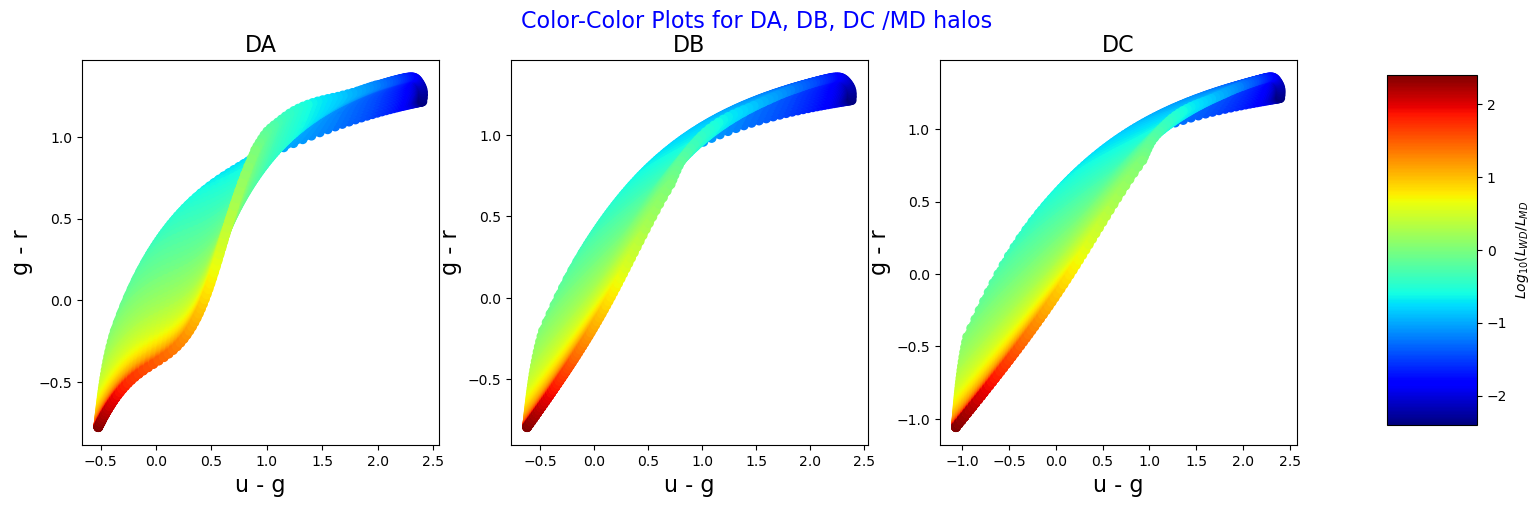

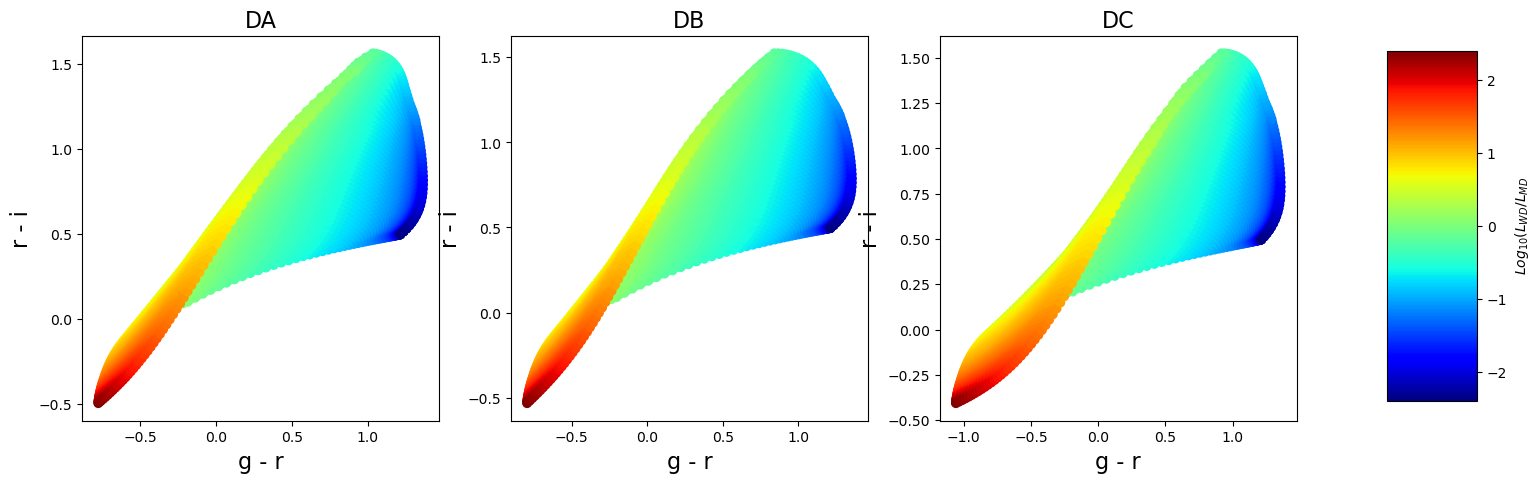

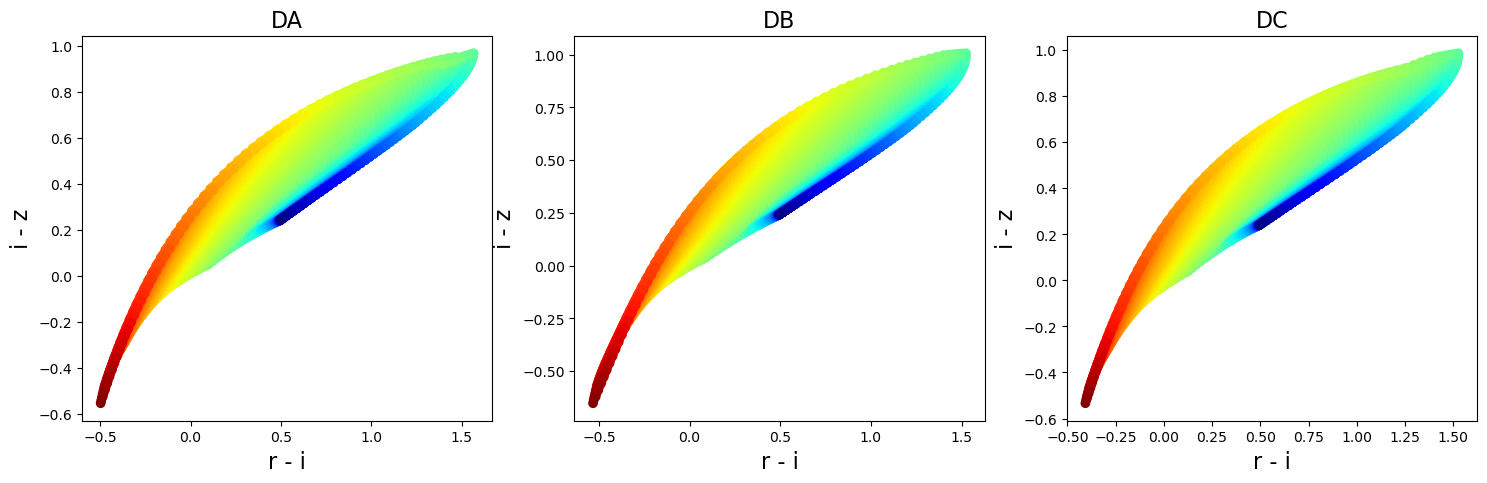

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
WD = ['DA', 'DB', 'DC']

for i in range(len(ax)):
    ax[i].set_xlabel('u - g', fontsize=16)
    ax[i].set_ylabel('g - r', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WDMD2['DAh_ug'], df_WDMD2['DAh_gr'], c=np.log10(df_WDMD2['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBh_ug'], df_WDMD2['DBh_gr'], c=np.log10(df_WDMD2['DBh_rfratio']), 
                       cmap=cmap)
im = ax[2].scatter(df_WDMD2['DCh_ug'], df_WDMD2['DCh_gr'], c=np.log10(df_WDMD2['DCh_rfratio']), 
                       cmap=cmap)

fig.suptitle('Color-Color Plots for DA, DB, DC /MD halos', fontsize=16, color='blue')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')

fig, ax = plt.subplots(1, 3, figsize=(18,5))

for i in range(len(ax)):
    ax[i].set_xlabel('g - r', fontsize=16)
    ax[i].set_ylabel('r - i', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WDMD2['DAh_gr'], df_WDMD2['DAh_ri'], c=np.log10(df_WDMD2['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBh_gr'], df_WDMD2['DBh_ri'], c=np.log10(df_WDMD2['DBh_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCh_gr'], df_WDMD2['DCh_ri'], c=np.log10(df_WDMD2['DCh_rfratio']), 
                       cmap=cmap, label='DC')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')

fig, ax = plt.subplots(1, 3, figsize=(18,5))
WD = ['DA', 'DB', 'DC']

for i in range(len(ax)):
    ax[i].set_xlabel('r - i', fontsize=16)
    ax[i].set_ylabel('i - z', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WDMD2['DAh_ri'], df_WDMD2['DAh_iz'], c=np.log10(df_WDMD2['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBh_ri'], df_WDMD2['DBh_iz'], c=np.log10(df_WDMD2['DBh_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCh_ri'], df_WDMD2['DCh_iz'], c=np.log10(df_WDMD2['DCh_rfratio']), 
                       cmap=cmap, label='DC')



#### <span style="color:blue"> Disk Objects

Text(0.5, 0.98, 'Color-Color Plots for Disk WD/MD Model')

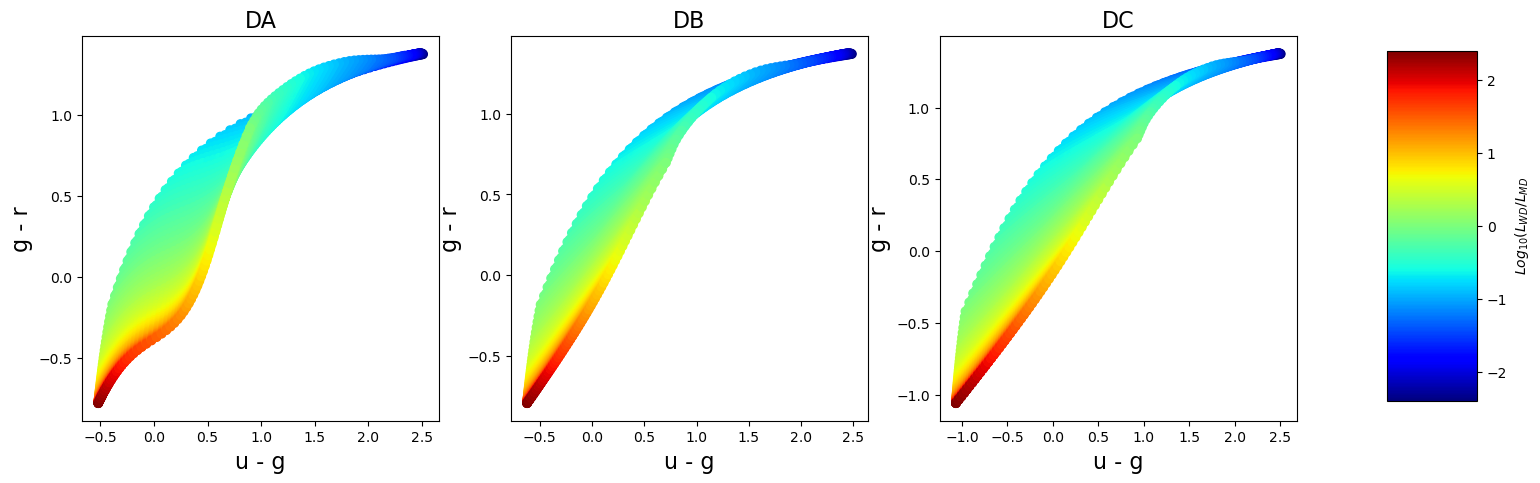

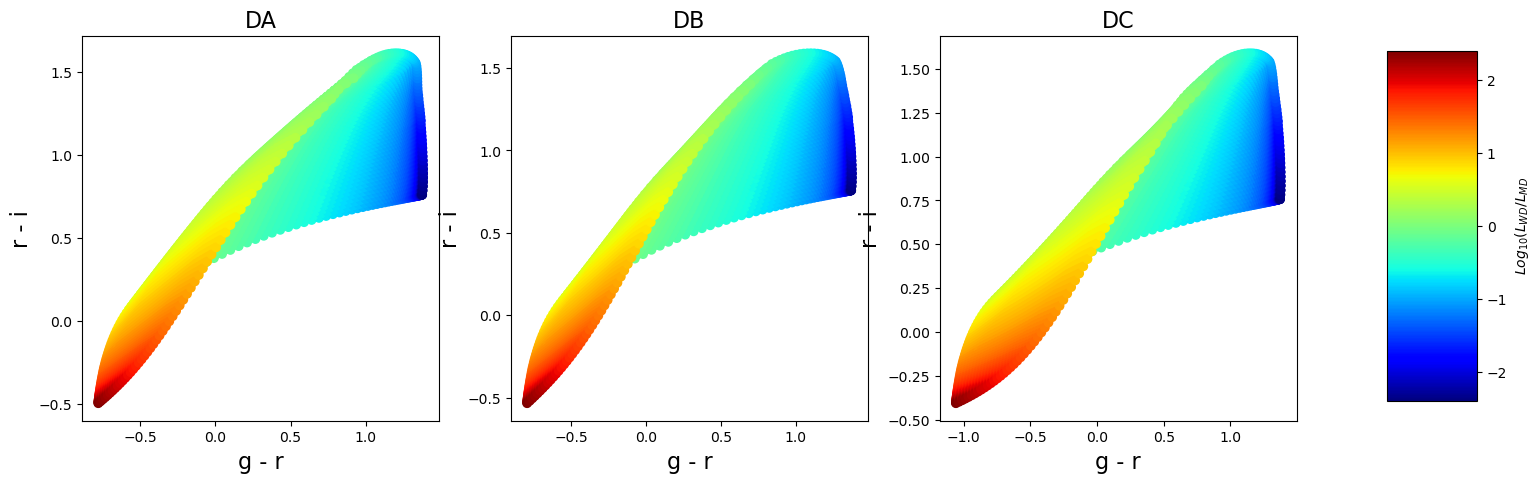

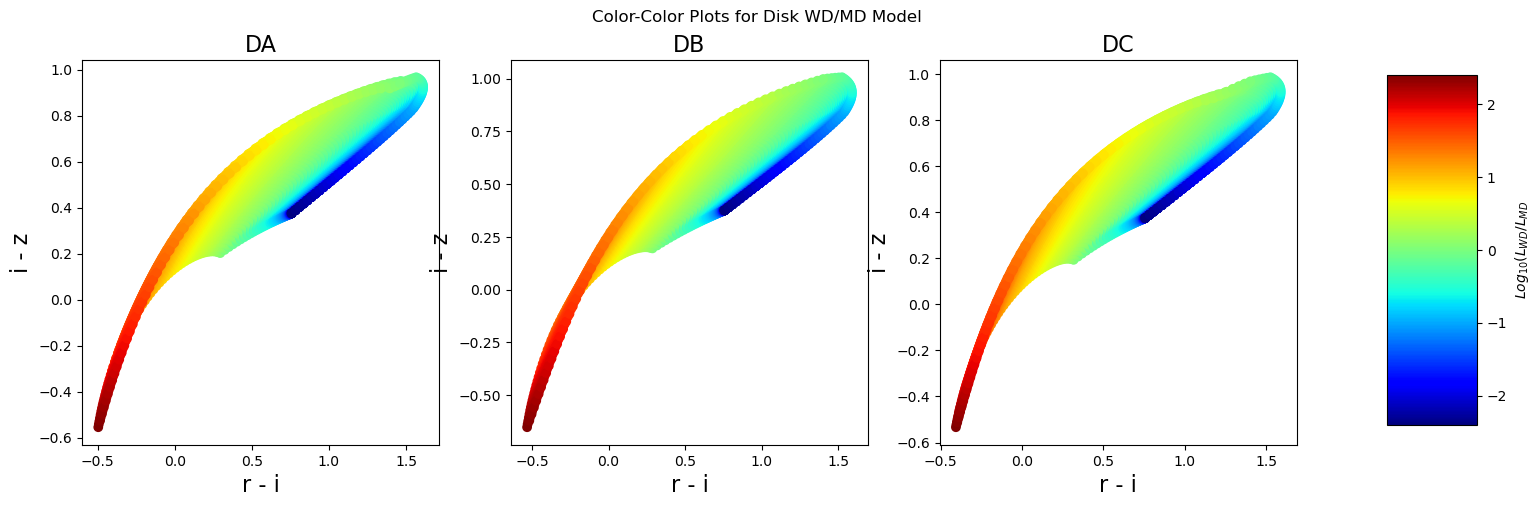

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
WD = ['DA', 'DB', 'DC']

for i in range(len(ax)):
    ax[i].set_xlabel('u - g', fontsize=16)
    ax[i].set_ylabel('g - r', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WDMD2['DAd_ug'], df_WDMD2['DAd_gr'], c=np.log10(df_WDMD2['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBd_ug'], df_WDMD2['DBd_gr'], c=np.log10(df_WDMD2['DBd_rfratio']), 
                       cmap=cmap)
im = ax[2].scatter(df_WDMD2['DCd_ug'], df_WDMD2['DCd_gr'], c=np.log10(df_WDMD2['DCd_rfratio']), 
                       cmap=cmap)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')

fig, ax = plt.subplots(1, 3, figsize=(18,5))

for i in range(len(ax)):
    ax[i].set_xlabel('g - r', fontsize=16)
    ax[i].set_ylabel('r - i', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WDMD2['DAd_gr'], df_WDMD2['DAd_ri'], c=np.log10(df_WDMD2['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBd_gr'], df_WDMD2['DBd_ri'], c=np.log10(df_WDMD2['DBd_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCd_gr'], df_WDMD2['DCd_ri'], c=np.log10(df_WDMD2['DCd_rfratio']), 
                       cmap=cmap, label='DC')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')

fig, ax = plt.subplots(1, 3, figsize=(18,5))
WD = ['DA', 'DB', 'DC']

for i in range(len(ax)):
    ax[i].set_xlabel('r - i', fontsize=16)
    ax[i].set_ylabel('i - z', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)

im = ax[0].scatter(df_WDMD2['DAd_ri'], df_WDMD2['DAd_iz'], c=np.log10(df_WDMD2['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBd_ri'], df_WDMD2['DBd_iz'], c=np.log10(df_WDMD2['DBd_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCd_ri'], df_WDMD2['DCd_iz'], c=np.log10(df_WDMD2['DCd_rfratio']), 
                       cmap=cmap, label='DC')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')
fig.suptitle('Color-Color Plots for Disk WD/MD Model')


### <span style="color:blue"> VII. Compare Color-Magnitude Plots for Each Type of Binary System

#### <span style="color:blue"> Halo Objects

Text(0.5, 0.98, 'Color-Magnitude Plots for Halo WD/MD Model')

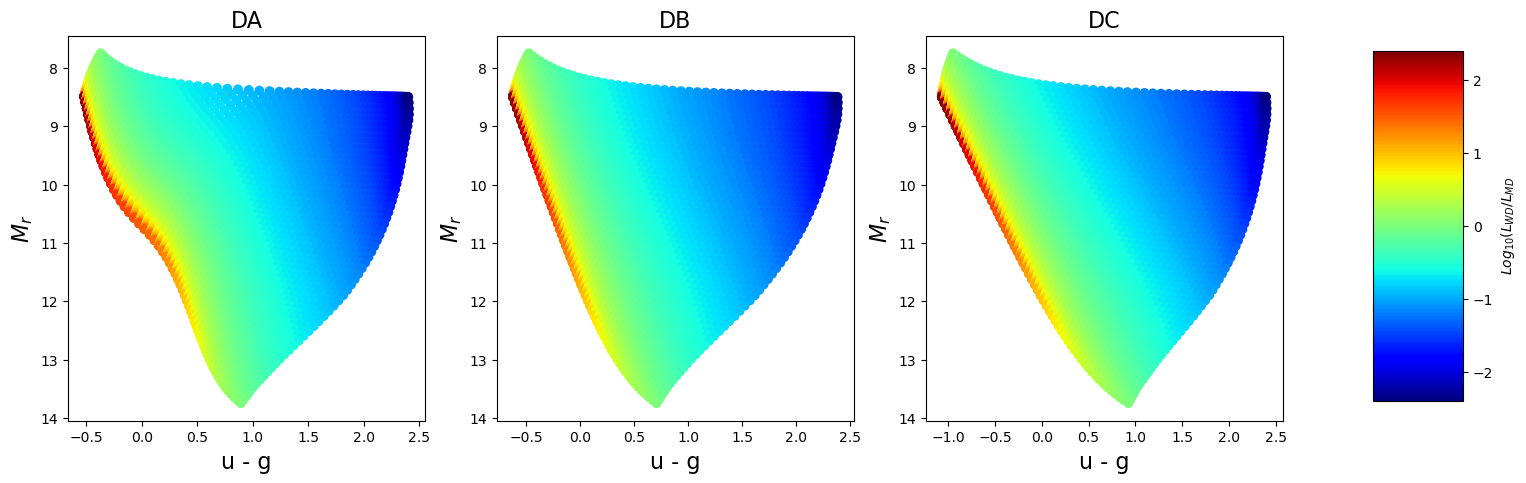

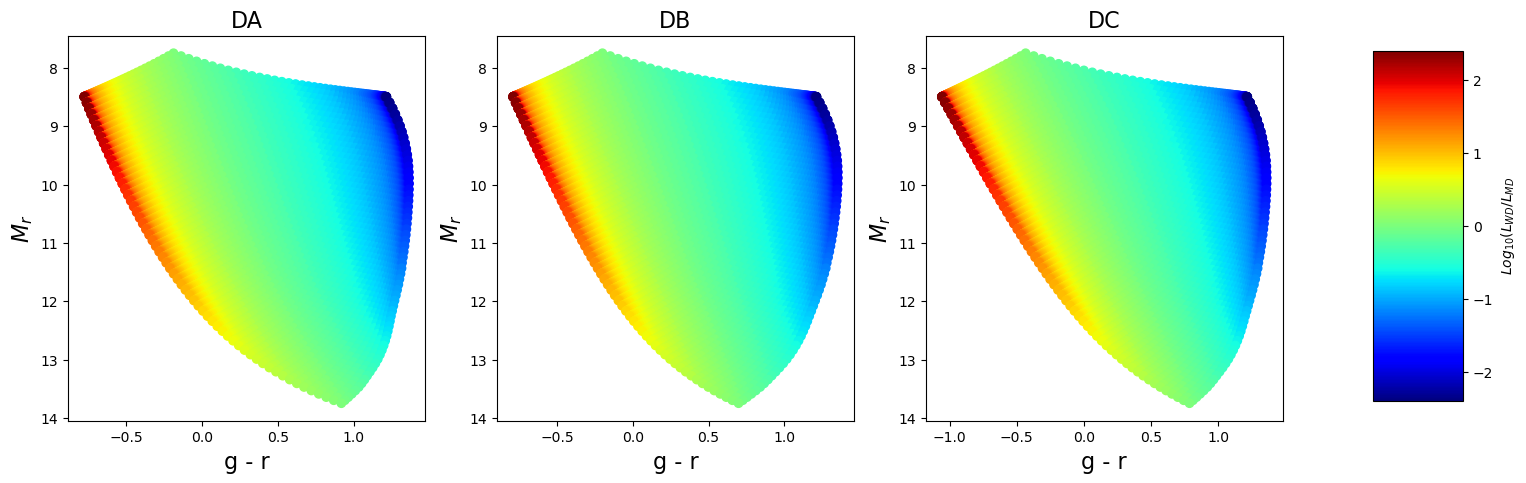

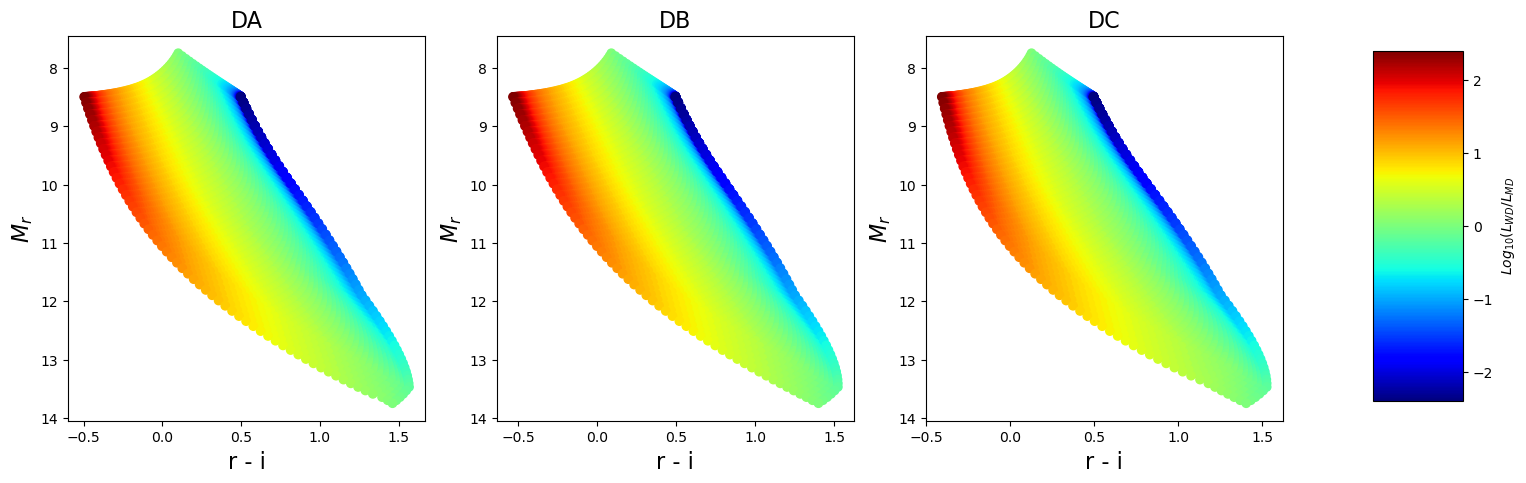

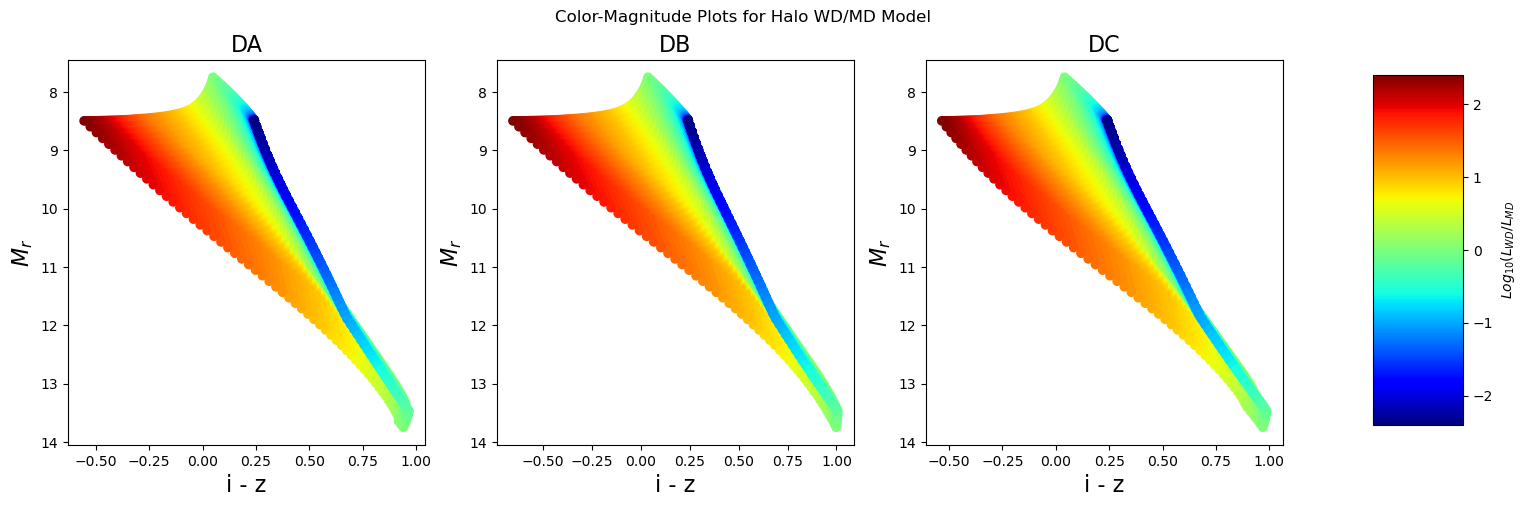

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('u - g', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD2['DAh_ug'], df_WDMD2['DAh_Mr'], c=np.log10(df_WDMD2['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBh_ug'], df_WDMD2['DBh_Mr'], c=np.log10(df_WDMD2['DBh_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCh_ug'], df_WDMD2['DCh_Mr'], c=np.log10(df_WDMD2['DCh_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('g - r', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD2['DAh_gr'], df_WDMD2['DAh_Mr'], c=np.log10(df_WDMD2['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBh_gr'], df_WDMD2['DBh_Mr'], c=np.log10(df_WDMD2['DBh_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCh_gr'], df_WDMD2['DCh_Mr'], c=np.log10(df_WDMD2['DCh_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('r - i', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD2['DAh_ri'], df_WDMD2['DAh_Mr'], c=np.log10(df_WDMD2['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBh_ri'], df_WDMD2['DBh_Mr'], c=np.log10(df_WDMD2['DBh_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCh_ri'], df_WDMD2['DCh_Mr'], c=np.log10(df_WDMD2['DCh_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('i - z', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD2['DAh_iz'], df_WDMD2['DAh_Mr'], c=np.log10(df_WDMD2['DAh_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBh_iz'], df_WDMD2['DBh_Mr'], c=np.log10(df_WDMD2['DBh_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCh_iz'], df_WDMD2['DCh_Mr'], c=np.log10(df_WDMD2['DCh_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')
fig.suptitle('Color-Magnitude Plots for Halo WD/MD Model')

#### <span style="color:blue"> Disk Objects

Text(0.5, 0.98, 'Color-Magnitude Plots for Disk WD/MD Model')

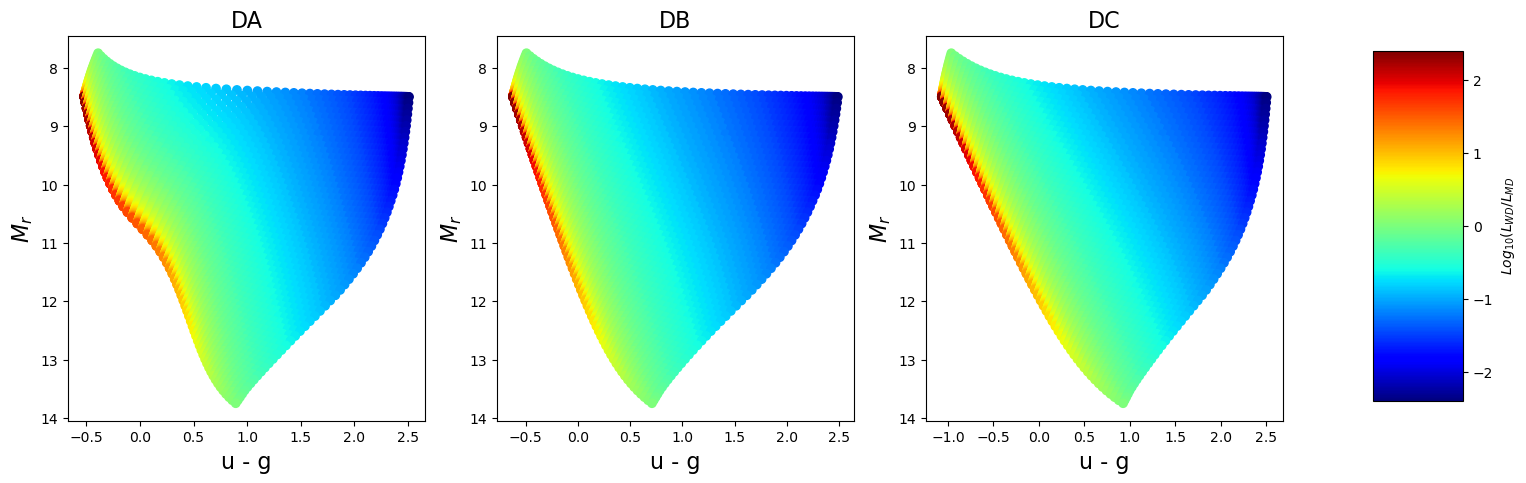

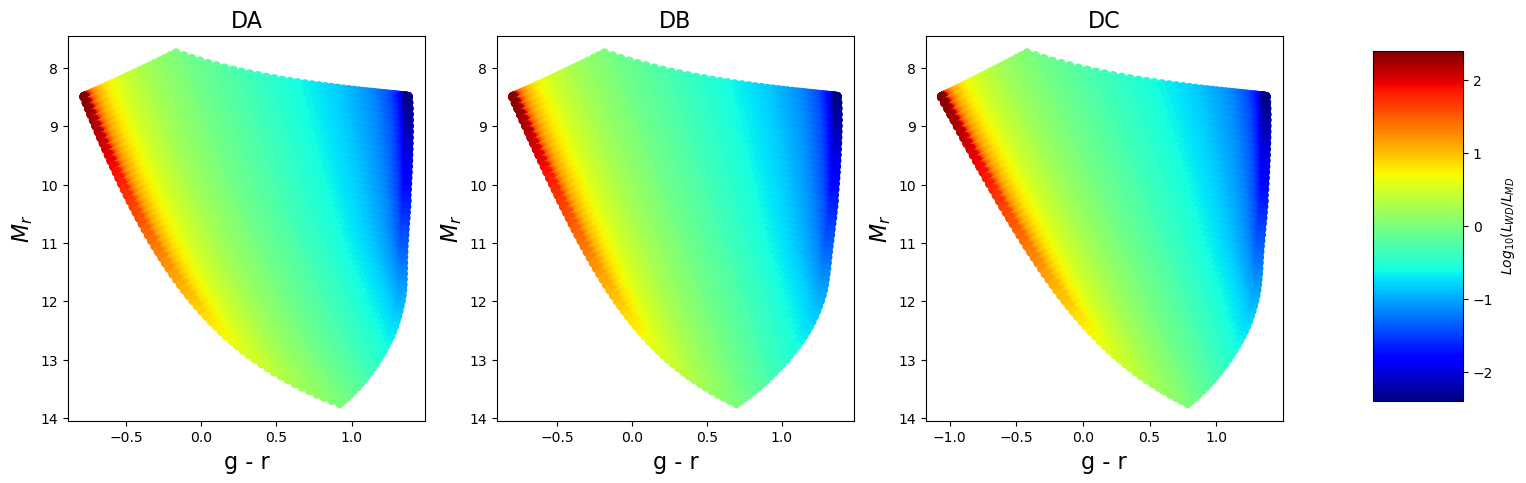

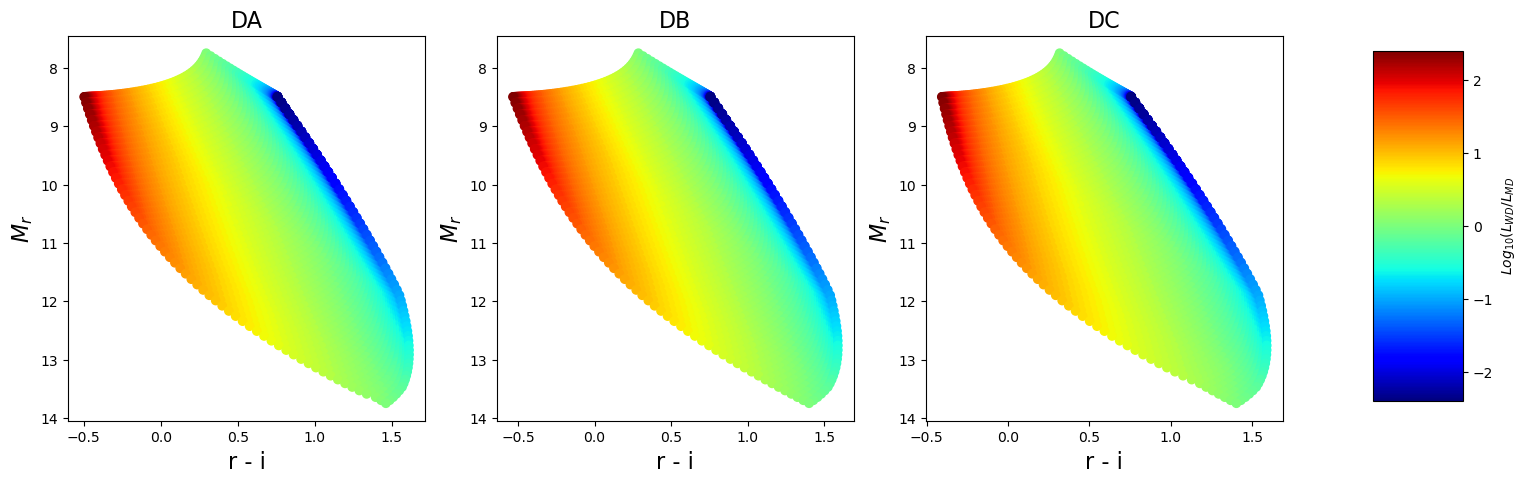

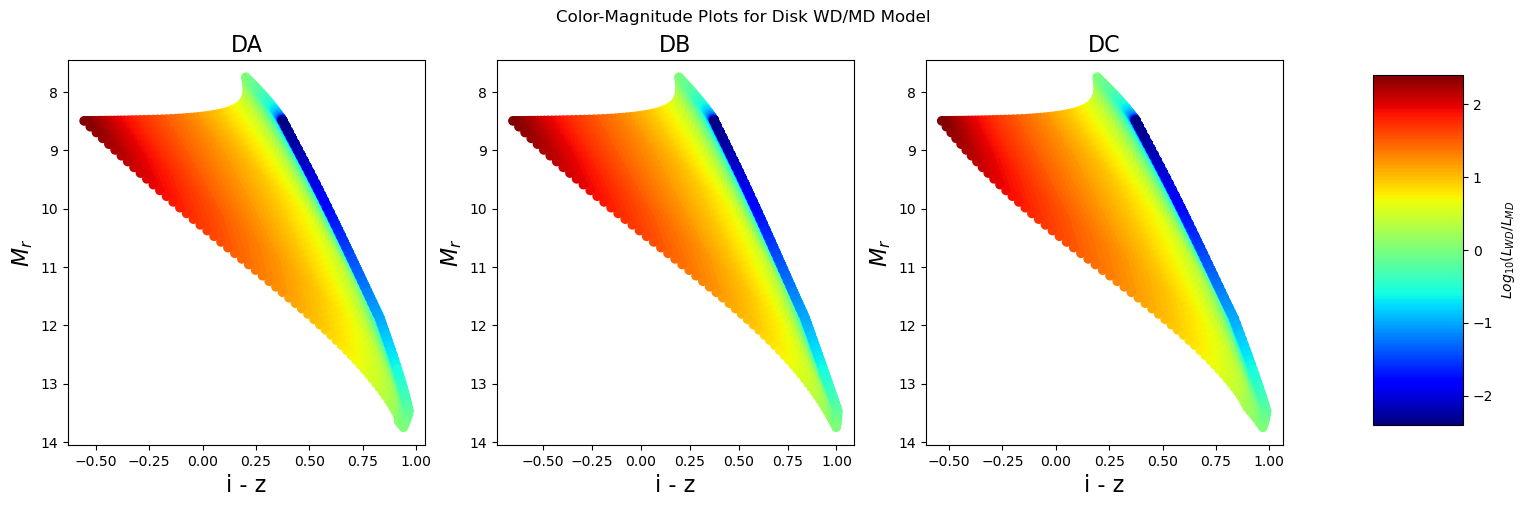

In [29]:
WD = ['DA', 'DB', 'DC']

fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('u - g', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD2['DAd_ug'], df_WDMD2['DAd_Mr'], c=np.log10(df_WDMD2['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBd_ug'], df_WDMD2['DBd_Mr'], c=np.log10(df_WDMD2['DBd_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCd_ug'], df_WDMD2['DCd_Mr'], c=np.log10(df_WDMD2['DCd_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('g - r', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD2['DAd_gr'], df_WDMD2['DAd_Mr'], c=np.log10(df_WDMD2['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBd_gr'], df_WDMD2['DBd_Mr'], c=np.log10(df_WDMD2['DBd_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCd_gr'], df_WDMD2['DCd_Mr'], c=np.log10(df_WDMD2['DCd_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('r - i', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD2['DAd_ri'], df_WDMD2['DAd_Mr'], c=np.log10(df_WDMD2['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBd_ri'], df_WDMD2['DBd_Mr'], c=np.log10(df_WDMD2['DBd_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCd_ri'], df_WDMD2['DCd_Mr'], c=np.log10(df_WDMD2['DCd_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')


fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i in range(len(ax)):
    ax[i].set_xlabel('i - z', fontsize=16)
    ax[i].set_ylabel('$M_{r}$', fontsize=16)
    ax[i].set_title(WD[i], fontsize=16)
    ax[i].invert_yaxis()
im = ax[0].scatter(df_WDMD2['DAd_iz'], df_WDMD2['DAd_Mr'], c=np.log10(df_WDMD2['DAd_rfratio']), 
                       cmap=cmap)
im = ax[1].scatter(df_WDMD2['DBd_iz'], df_WDMD2['DBd_Mr'], c=np.log10(df_WDMD2['DBd_rfratio']), 
                       cmap=cmap, label='DB')
im = ax[2].scatter(df_WDMD2['DCd_iz'], df_WDMD2['DCd_Mr'], c=np.log10(df_WDMD2['DCd_rfratio']), 
                       cmap=cmap, label='DC')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='$Log_{10}$($L_{WD}$/$L_{MD}$')
fig.suptitle('Color-Magnitude Plots for Disk WD/MD Model')


### <span style="color:blue"> VIII. Save df_WDMD2 to WDMD.csv

In [30]:
df_WDMD2.to_csv('WDMD.csv', index=False)